<a href="https://colab.research.google.com/github/MarcoATL/MachineLearning/blob/main/Practica2_DeteccionSpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de mensajes de texto con Naive Bayes  

### Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import io
import pickle
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sms = pd.read_csv('/content/drive/My Drive/CURSO ML Y DL/Clasificación/Practicas/sms_spam.csv')

In [ ]:
print('Tamaño del dataset')
print('Número de ejemplos: {}'.format(sms.shape[0]))
print('Número de características: {}'.format(sms.shape[1]))

Tamaño del dataset
Número de ejemplos: 5574
Número de características: 2


In [ ]:
sms.sample(7)

,type,text
3003,ham,"Excellent, I'll see what riley's plans are"
914,ham,Ok lor but not too early. Me still having proj...
1081,ham,You tell what happen dont behave like this to ...
1095,ham,Now only i reached home. . . I am very tired n...
4313,ham,I keep ten rs in my shelf:) buy two egg.
4406,ham,Dun need to use dial up juz open da browser n ...
2224,spam,"Thanks for your ringtone order, ref number K71..."


### Separar conjunto de datos en entrenamiento y prueba

In [ ]:
X = np.asarray(sms.text)
y = np.asarray(sms.type)
print('X shape: ' + str(X.shape))
print('y shape: ' + str(y.shape))

X shape: (5574,)
y shape: (5574,)


In [ ]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
print('X_train shape: ' + str(X_train.shape))
print('y_train shape: ' + str(y_train.shape))

X_train shape: (4459,)
y_train shape: (4459,)


In [ ]:
print('X_test shape: ' + str(X_test.shape))
print('y_test shape: ' + str(y_test.shape))

X_test shape: (1115,)
y_test shape: (1115,)


### Exploración y preprocesamiento de los datos

In [ ]:
X_train = pd.DataFrame(X_train, columns = ['Text'])

In [ ]:
y_train = pd.Series(y_train)

In [ ]:
X_test = pd.DataFrame(X_test, columns = ['Text'])
y_test = pd.Series(y_test)

###### Limpieza de los datos

In [ ]:
X_train ['Text'] = X_train.Text.map(lambda x: x.lower())  #Convert all SMS messages to lowercase
X_train ['Text']

0       free2day sexy st george's day pic of jordan!tx...
1                armand says get your ass over to epsilon
2                 lol now i'm after that hot air balloon!
3       you know, wot people wear. t shirts, jumpers, ...
4       good morning, my love ... i go to sleep now an...
                              ...                        
4454    hi, wlcome back, did wonder if you got eaten b...
4455    ree entry in 2 a weekly comp for a chance to w...
4456    "oh fuck. juswoke up in a bed on a boatin the ...
4457             not much no fights. it was a good nite!!
4458              did he just say somebody is named tampa
Name: Text, Length: 4459, dtype: object

In [ ]:
X_train ['Text'] = X_train ['Text'].apply(nltk.word_tokenize)  #Words tokenize
X_train ['Text']

0       [free2day, sexy, st, george, 's, day, pic, of,...
1       [armand, says, get, your, ass, over, to, epsilon]
2       [lol, now, i, 'm, after, that, hot, air, ballo...
3       [you, know, ,, wot, people, wear, ., t, shirts...
4       [good, morning, ,, my, love, ..., i, go, to, s...
                              ...                        
4454    [hi, ,, wlcome, back, ,, did, wonder, if, you,...
4455    [ree, entry, in, 2, a, weekly, comp, for, a, c...
4456    [``, oh, fuck, ., juswoke, up, in, a, bed, on,...
4457    [not, much, no, fights, ., it, was, a, good, n...
4458     [did, he, just, say, somebody, is, named, tampa]
Name: Text, Length: 4459, dtype: object

In [ ]:
nltk_words = list(stopwords.words('english')) #List of stopwords in english
print(nltk_words)
for i in range(0,len(X_train)):
    X_train ['Text'][i] = [w for w in X_train ['Text'][i] if w not in nltk_words]  
X_train ['Text']

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

0       [free2day, sexy, st, george, 's, day, pic, jor...
1                       [armand, says, get, ass, epsilon]
2                         [lol, 'm, hot, air, balloon, !]
3       [know, ,, wot, people, wear, ., shirts, ,, jum...
4       [good, morning, ,, love, ..., go, sleep, wish,...
                              ...                        
4454    [hi, ,, wlcome, back, ,, wonder, got, eaten, l...
4455    [ree, entry, 2, weekly, comp, chance, win, ipo...
4456    [``, oh, fuck, ., juswoke, bed, boatin, docks,...
4457                  [much, fights, ., good, nite, !, !]
4458                        [say, somebody, named, tampa]
Name: Text, Length: 4459, dtype: object

In [ ]:
X_train['Text'] = X_train ['Text'].apply(lambda x: ' '.join(x)) # This converts the list of words into space-separated strings
X_train['Text'].head()

0    free2day sexy st george 's day pic jordan ! tx...
1                          armand says get ass epsilon
2                             lol 'm hot air balloon !
3    know , wot people wear . shirts , jumpers , ha...
4    good morning , love ... go sleep wish great da...
Name: Text, dtype: object

In [ ]:
X_train ['Text'] = X_train.Text.str.replace('[^\w\s]','') #Remove punctuation
X_train ['Text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0       free2day sexy st george s day pic jordan  txt ...
1                             armand says get ass epsilon
2                                  lol m hot air balloon 
3       know  wot people wear  shirts  jumpers  hat  b...
4       good morning  love  go sleep wish great day fu...
                              ...                        
4454    hi  wlcome back  wonder got eaten lion somethi...
4455    ree entry 2 weekly comp chance win ipod  txt p...
4456     oh fuck  juswoke bed boatin docks  slept wid ...
4457                             much fights  good nite  
4458                             say somebody named tampa
Name: Text, Length: 4459, dtype: object

In [ ]:
X_train ['Text'] = X_train.Text.str.replace('[0-9]','') #Remove any numbers
X_train ['Text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0       freeday sexy st george s day pic jordan  txt p...
1                             armand says get ass epsilon
2                                  lol m hot air balloon 
3       know  wot people wear  shirts  jumpers  hat  b...
4       good morning  love  go sleep wish great day fu...
                              ...                        
4454    hi  wlcome back  wonder got eaten lion somethi...
4455    ree entry  weekly comp chance win ipod  txt po...
4456     oh fuck  juswoke bed boatin docks  slept wid ...
4457                             much fights  good nite  
4458                             say somebody named tampa
Name: Text, Length: 4459, dtype: object

In [ ]:
def wordsCleaning(sms_text):
    sms_text = sms_text.map(lambda x: x.lower())  #Convert all SMS messages to lowercase
    sms_text = sms_text.apply(nltk.word_tokenize) #Words tokenize
    nltk_words = list(stopwords.words('english')) #List of stopwords in english
    for i in range(0,len(sms_text)):
        sms_text[i] = [w for w in sms_text[i] if w not in nltk_words]  
    sms_text = sms_text.apply(lambda x: ' '.join(x)) # This converts the list of words into space-separated strings
    sms_text = sms_text.str.replace('[^\w\s]','') #Remove punctuation
    sms_text = sms_text.str.replace('[0-9]','') #Remove any numbers 
    return sms_text

In [ ]:
X_test['Text'] = wordsCleaning(X_test['Text'])
X_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


,Text
0,still coming tonight
1,hey babe far spunout spk da mo dead da w...
2,ya even cookies jelly
3,sorry ve gone place ill tomorrow really sorry
4,going ride bike


### Análisis de las etiquetas

In [ ]:
print('Número de mensajes importantes y spam: ')
print(y_train.value_counts())

Número de mensajes importantes y spam: 
ham     3873
spam     586
dtype: int64


In [ ]:
def porcentajeClases(output):
    percent = output.value_counts() 
    clase1 = (percent[0]*100)/(percent[0]+percent[1])
    clase2 = (percent[1]*100)/(percent[0]+percent[1])
    return (clase1, clase2)

In [ ]:
[nosp, sp] = porcentajeClases(y_train)
print('Porcentaje de mensajes importantes: {}%'.format(nosp))
print('Porcentaje de mensajes spam: {}%'.format(sp))

Porcentaje de mensajes importantes: 86.85803991926441%
Porcentaje de mensajes spam: 13.141960080735592%


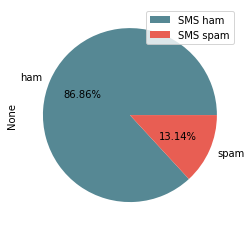

In [ ]:
# Numero de ejemplos positivos y de ejemplos negativos
labels = ['SMS ham','SMS spam'] 
colors = ['#568894', '#E85E53']

y_train.value_counts().plot(kind='pie', autopct='%1.2f%%', colors=colors)
plt.legend(labels)
plt.show()

In [ ]:
[nosp, sp] = porcentajeClases(y_test)
print('Porcentaje de mensajes importantes: {}%'.format(nosp))
print('Porcentaje de mensajes spam: {}%'.format(sp))

Porcentaje de mensajes importantes: 85.56053811659193%
Porcentaje de mensajes spam: 14.439461883408072%


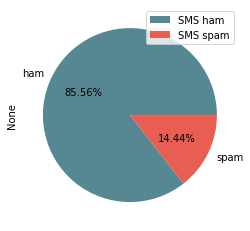

In [ ]:
y_test.value_counts().plot(kind='pie', autopct='%1.2f%%', colors=colors)
plt.legend(labels)
plt.show()

### Análisis exploratorio

In [ ]:
def generatingWordCloud(text):
    wordcloud = WordCloud(width=800, height=800,background_color='white', min_font_size=10).generate(str(text))  
    plt.figure(figsize=(6, 6), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

Wordcloud de mensajes importantes


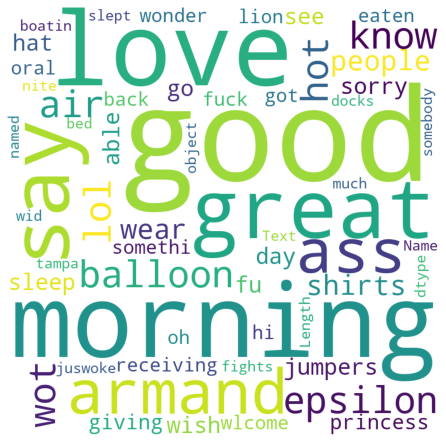

Wordcloud de mensajes spam


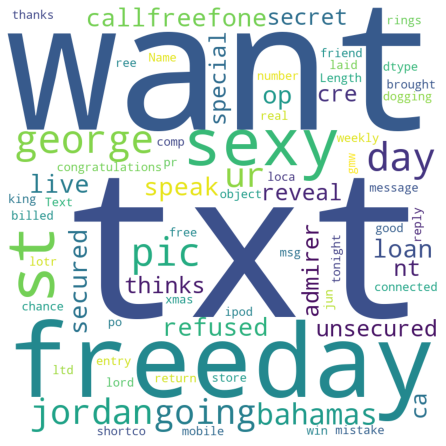

In [ ]:
print('Wordcloud de mensajes importantes')
generatingWordCloud(X_train.loc[y_train == 'ham'].Text)
print('Wordcloud de mensajes spam')
generatingWordCloud(X_train.loc[y_train == 'spam'].Text)

### Creación de modelo de espacio vectorial

In [ ]:
bagofWords = CountVectorizer(min_df = 5) #Creamos el modelo de espacio vectorial (bolsa de palabras)  con los valores tf
bw_train = bagofWords.fit_transform(X_train['Text'])
print('Tamaño del modelo de espacio vectorial con todas las palabras: ')
print(bw_train.shape)

Tamaño del modelo de espacio vectorial con todas las palabras: 
(4459, 1338)


In [ ]:
df_bow_sklearn = pd.DataFrame(bw_train.toarray(),columns=bagofWords.get_feature_names_out())
df_bow_sklearn.head()

,abiola,able,abt,accept,account,across,activate,actually,add,added,...,yes,yesterday,yet,yo,yoga,yr,yrs,yun,yup,zed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Vocabulary: ", bagofWords.vocabulary_)

Vocabulary:  {'sexy': 999, 'st': 1065, 'day': 257, 'pic': 845, 'txt': 1191, 'dont': 294, 'miss': 712, 'every': 343, 'wk': 1287, 'pics': 849, 'says': 969, 'get': 429, 'ass': 64, 'lol': 634, 'hot': 507, 'air': 22, 'know': 581, 'wot': 1305, 'people': 838, 'good': 446, 'morning': 733, 'love': 648, 'go': 439, 'sleep': 1027, 'wish': 1280, 'great': 453, 'full': 413, 'feeling': 372, 'better': 98, 'last': 590, 'thought': 1140, 'babe': 77, 'kiss': 578, 'ur': 1207, 'going': 443, 'speak': 1057, 'live': 624, 'operator': 812, 'claim': 187, 'either': 320, 'cash': 159, 'only': 808, 'opt': 814, 'sorry': 1050, 'able': 1, 'see': 979, 'll': 626, 'call': 141, 'later': 592, 'party': 832, 'alex': 26, 'crazy': 234, 'ar': 52, 'married': 675, 'like': 617, 'gd': 427, 'looking': 640, 'guys': 460, 'frens': 402, 'say': 967, 'dun': 308, 'thk': 1136, 'aft': 14, 'thinking': 1134, 'mayb': 682, 'prob': 895, 'somewhere': 1046, 'right': 943, 'ill': 529, 'tomorrow': 1157, 'lucky': 660, 'man': 670, 'save': 965, 'money': 727

In [ ]:
print(bw_train.shape)

(4459, 1338)


In [ ]:
print(bw_train)

  (0, 999)	1
  (0, 1065)	1
  (0, 257)	1
  (0, 845)	2
  (0, 1191)	1
  (0, 294)	1
  (0, 712)	1
  (0, 343)	1
  (0, 1287)	2
  (0, 849)	1
  (1, 969)	1
  (1, 429)	1
  (1, 64)	1
  (2, 634)	1
  (2, 507)	1
  (2, 22)	1
  (3, 581)	2
  (3, 1305)	1
  (3, 838)	1
  (4, 257)	1
  (4, 446)	1
  (4, 733)	1
  (4, 648)	2
  (4, 439)	1
  (4, 1027)	1
  :	:
  (4455, 335)	2
  (4455, 1277)	1
  (4455, 50)	1
  (4455, 273)	1
  (4455, 1262)	1
  (4455, 911)	1
  (4455, 547)	1
  (4455, 207)	1
  (4455, 1076)	1
  (4456, 248)	1
  (4456, 411)	1
  (4456, 799)	1
  (4456, 1325)	1
  (4456, 803)	1
  (4456, 93)	1
  (4456, 1318)	1
  (4456, 1272)	1
  (4456, 1029)	1
  (4456, 656)	1
  (4457, 446)	1
  (4457, 747)	1
  (4457, 776)	1
  (4458, 967)	1
  (4458, 1042)	1
  (4458, 1111)	1


In [ ]:
bw_test = bagofWords.transform(X_test['Text'])

In [ ]:
# The multinomial Naive Bayes classifier is suitable for classification with discrete features (words)
naive_bayes = MultinomialNB()
naive_bayes.fit(bw_train, y_train)

MultinomialNB()

In [ ]:
y_pred = naive_bayes.predict(bw_test)
print('Matriz de confusión')
print(pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True))
print("----------------------------------------------------- ")
print('Metricas de clasificación')
print(classification_report(y_test,y_pred))

Matriz de confusión
Predicted  ham  spam   All
True                      
ham        935    19   954
spam        14   147   161
All        949   166  1115
----------------------------------------------------- 
Metricas de clasificación
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       954
        spam       0.89      0.91      0.90       161

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115



### Descargar y Cargar el modelo entrenado

In [ ]:
filename = '/content/drive/My Drive/CURSO ML Y DL/Clasificación/Practicas/spam_filter.sav'
pickle.dump(naive_bayes, open(filename, 'wb'))

In [ ]:
filename = '/content/drive/My Drive/CURSO ML Y DL/Clasificación/Practicas/bagofwords.sav'
pickle.dump(bagofWords, open(filename, 'wb'))

In [ ]:
model_Bayes = pickle.load(open('/content/drive/My Drive/CURSO ML Y DL/Clasificación/Practicas/spam_filter.sav', 'rb'))
bag_Words = pickle.load(open('/content/drive/My Drive/CURSO ML Y DL/Clasificación/Practicas/bagofwords.sav', 'rb'))

In [ ]:
prueba = [[1,"Congratulations you win a new car"],
        [2,"Urgent, click here to see your price"],
        [3,"Where are you? I've been looking for you all day"]]
prueba = pd.DataFrame(prueba,columns = ['Id','message'])

In [ ]:
prueba['message'] =  wordsCleaning(prueba['message'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


In [ ]:
bagofWordsp =  bag_Words.transform(prueba['message'])

In [ ]:
print(bagofWordsp) 

  (0, 153)	1
  (0, 215)	1
  (0, 768)	1
  (0, 1277)	1
  (1, 891)	1
  (1, 979)	1
  (1, 1208)	1
  (2, 257)	1
  (2, 640)	1
  (2, 1224)	1


In [ ]:
y_predp = model_Bayes.predict(bagofWordsp)

In [ ]:
y_predp

array(['spam', 'spam', 'ham'], dtype='<U4')